In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem Statement

We will build a mutiple linear regression model by selected useful features so we can then predict the price for other houses.

## Dataset
Data set from https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"
df = pd.read_excel(url)
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
#remove empty rows
# df = df.loc[df["Yearly Amount Spent"] != 0, :]

In [4]:
# Select the suitable variable which contains high correlation and useful
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [5]:
X_train = np.array(df[['X2 house age', "X3 distance to the nearest MRT station",'X4 number of convenience stores']])
y_train = np.array(df['Y house price of unit area'])

#### Visualize your data

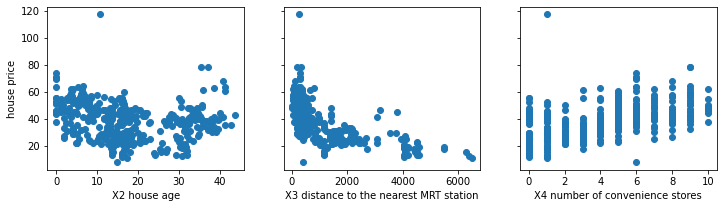

In [6]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parametersfig, ax = plt.subplots(1,4,figsize=(9,3), sharey=True)
fig,ax=plt.subplots(1, X_train.shape[1], figsize=(12, 3), sharey=True)   #X_train.shape[0] -->row/examples  , X_train.shape[1] --> column/X features
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(df.columns[i+2])
ax[0].set_ylabel("house price")
plt.show()

# z-score normalization 
To implement z-score normalization, adjust your input values as shown in this formula:

$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
Mean: \mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
SD: \sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [7]:
#min-max
# def Normalixation(series):
#     return (series - min(series)) / (max(series) - min(series))

#Z-score
def Normalixation(series):
    return ((series - np.mean(series, axis = 0)) / np.std(series, axis = 0))

In [8]:
X_train[:, 0] = Normalixation(X_train[:, 0])
X_train[:, 1] = Normalixation(X_train[:, 1])
X_train[:, 2] = Normalixation(X_train[:, 2])

## After Normalization

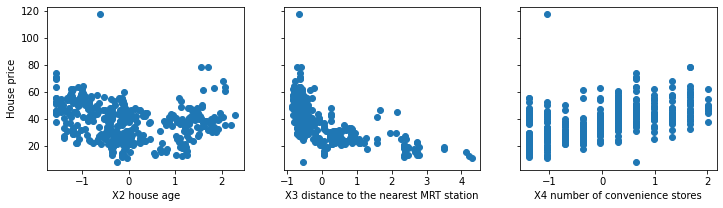

In [9]:
fig,ax=plt.subplots(1, X_train.shape[1], figsize=(12, 3), sharey=True)   #X_train.shape[0] -->row/examples  , X_train.shape[1] --> column/X features
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(df.columns[i+2])
ax[0].set_ylabel("House price")
plt.show()

# 1 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [10]:
#Initialize b and w
b_init = 0
w_init = np.zeros(X_train.shape[1])

In [11]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

## 2 Compute Gradient with Multiple Variables

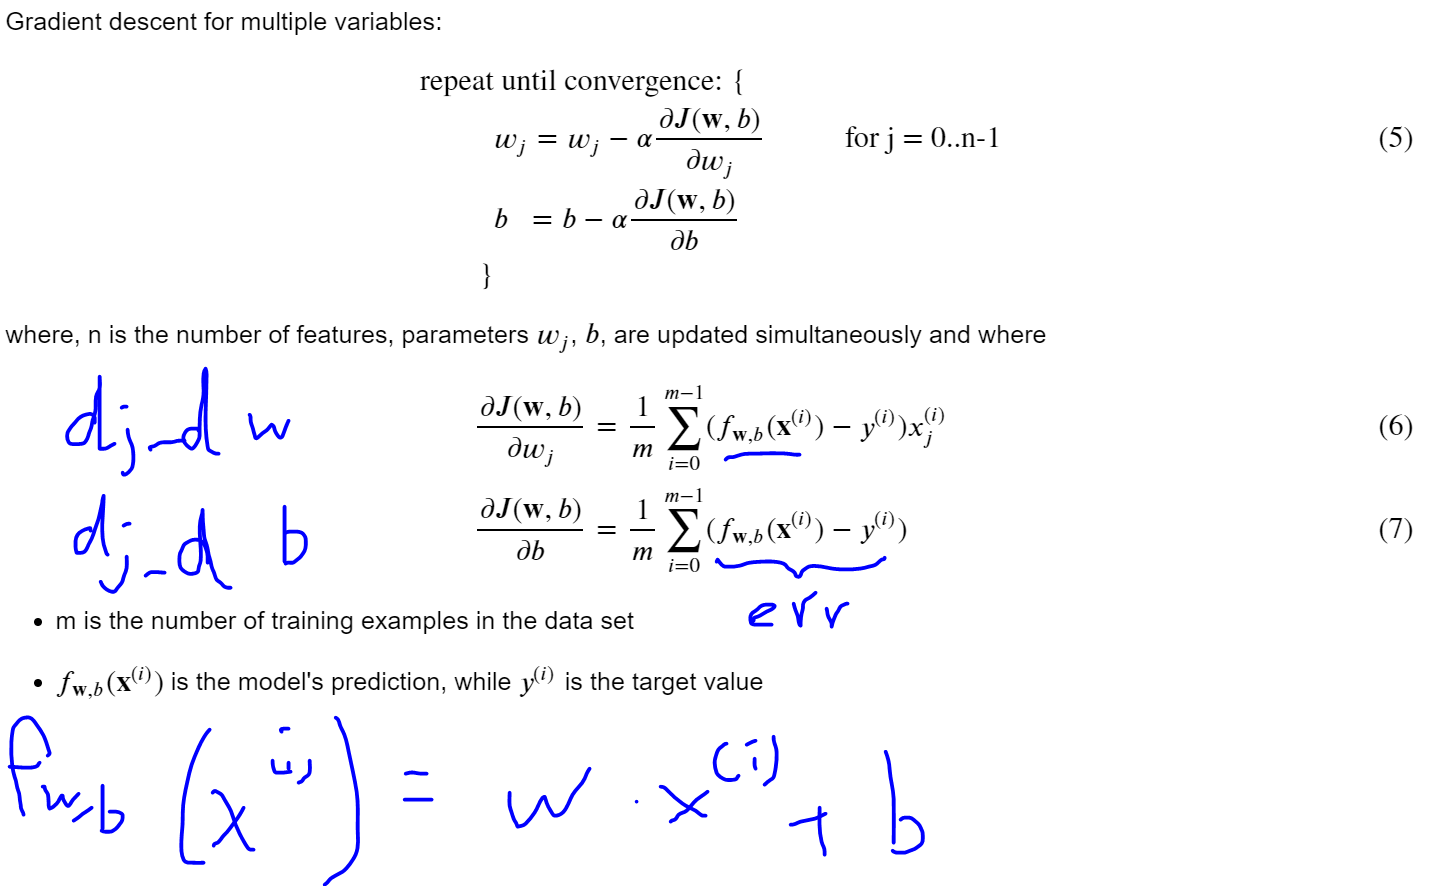

In [12]:
from IPython import display
display.Image("img.PNG")

In [13]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features) (499,3)
    dj_dw = np.zeros((n,))   # create empty array like array([0., 0., 0., 0.])
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    #check out which X you want e.g x[0,0] is 2104
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [14]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial b: {tmp_dj_db}')
print(f'dj_dw at initial w: \n {tmp_dj_dw}')

dj_db at initial b: -37.98019323671498
dj_dw at initial w: 
 [ 2.86161559  9.15442889 -7.75998233]


## 3 Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [15]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [16]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.0006
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost   812.64   
Iteration 1000: Cost   267.69   
Iteration 2000: Cost   109.35   
Iteration 3000: Cost    62.48   
Iteration 4000: Cost    48.46   
Iteration 5000: Cost    44.24   
Iteration 6000: Cost    42.96   
Iteration 7000: Cost    42.57   
Iteration 8000: Cost    42.44   
Iteration 9000: Cost    42.40   
b,w found by gradient descent: 37.89,[-2.8844611  -6.65812784  3.93908982] 


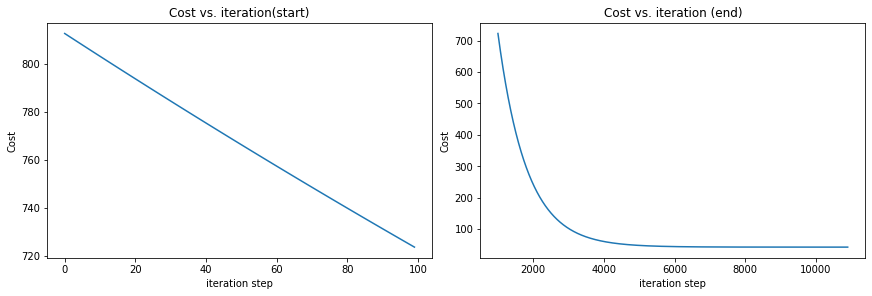

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

https://python.plainenglish.io/how-to-de-normalize-and-de-standardize-data-in-python-b4600cf9ee6

In [18]:
#By comparing first 20 actual Y and model predict Y

for i in range(20):
    print(f"model prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, Actual value: {y_train[i]}")

#By comparing actual Y and model predict Y
# m,_ = X_train.shape
# for i in range(20):
#     print(f"model prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, Actual value: {y_train[i]}")


model prediction: 47.45, Actual value: 37.9
model prediction: 48.11, Actual value: 42.2
model prediction: 42.97, Actual value: 47.3
model prediction: 42.97, Actual value: 54.8
model prediction: 45.98, Actual value: 43.1
model prediction: 33.35, Actual value: 32.1
model prediction: 39.95, Actual value: 40.3
model prediction: 43.99, Actual value: 46.7
model prediction: 6.81, Actual value: 18.8
model prediction: 32.68, Actual value: 22.1
model prediction: 33.00, Actual value: 41.4
model prediction: 52.59, Actual value: 58.1
model prediction: 43.42, Actual value: 39.3
model prediction: 29.76, Actual value: 23.8
model prediction: 38.48, Actual value: 34.3
model prediction: 33.19, Actual value: 50.5
model prediction: 49.11, Actual value: 70.1
model prediction: 37.62, Actual value: 37.4
model prediction: 47.10, Actual value: 42.3
model prediction: 51.49, Actual value: 47.7


### Predictions
Your final values of $w,b$ can also be used to make predictions on housing price. Let's predict what the housing price would be when using mean if each features.

- X2 house age.
- X3 distance to the nearest MRT station.
- X4 number of convenience stores.

In [19]:
mean_x2 = np.mean(df["X2 house age"])
mean_x3 = np.mean(df["X3 distance to the nearest MRT station"])
mean_x4 = np.mean(df["X4 number of convenience stores"])

testing_X = np.array([mean_x2,mean_x3,mean_x4])
print(f"Before normalization: {testing_X}")

#normalize sample X
testing_X[:] = Normalixation(testing_X)
print(f"After normalization: {testing_X}")


Before normalization: [  17.71256039 1083.88568891    4.0942029 ]
After normalization: [-0.69360292  1.41412814 -0.72052522]


In [20]:
print(f"model prediction of housing price: {np.dot(testing_X, w_final) + b_final:0.2f}")

model prediction of housing price: 27.63


#### Therefore, when features are
- X2 house age = 17.71256039
- X3 distance to the nearest MRT station = 1083.88568891
- X4 number of convenience stores = 4.0942029

Therefore, we predict the housing price is 27.63